# Aggregation and Grouping — Day 8 HW

### Imports and Installs

In [6]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns


In [2]:
!conda install -c conda-forge -y kagglehub

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - conda-forge
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): - 
doneing environment: \ 


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - kagglehub


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.10.5  |       hbd8a1cb_0         152 KB  conda-forge
    certifi-2025.10.5          |     pyhd8ed1ab_0         156 KB  conda-forge
    kagglehub-0.3.8            |     pyhd8ed1ab_0          44 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         

In [8]:
!conda install -c conda-forge -y pandas

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): - 
doneing environment: / 


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-2.3.1               |  py313h19bd442_0        14.6 MB
    ------------------------------------------------------------
                                           Total:        14.6 MB

The following packages will be UPDATED:

  pandas                              2.2.3-py313h6d0c2b6_0 --> 2.3.1-py313h19bd442_0 



                                                        

In [10]:
import kagglehub

path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2


In [17]:
(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
data_path = os.path.join(path, "vgsales.csv")

df = pd.read_csv(data_path)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Initital Observations**

- Dataset contains video game sales by reigion, platform, year, and publisher
- The dataset is from kagglehub, https://www.kaggle.com/datasets/gregorut/videogamesales
- They are counting by the millions
- There is some missing data with in the year and publisher rows.

### 1. Cross-tabulation of platforms and genres

In [18]:
platform_genre_ct = pd.crosstab(df['Platform'], df['Genre'])

platform_genre_ct['Total'] = platform_genre_ct.sum(axis=1)

platform_genre_ct = platform_genre_ct.sort_values(by='Total', ascending=False)

platform_genre_ct.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265


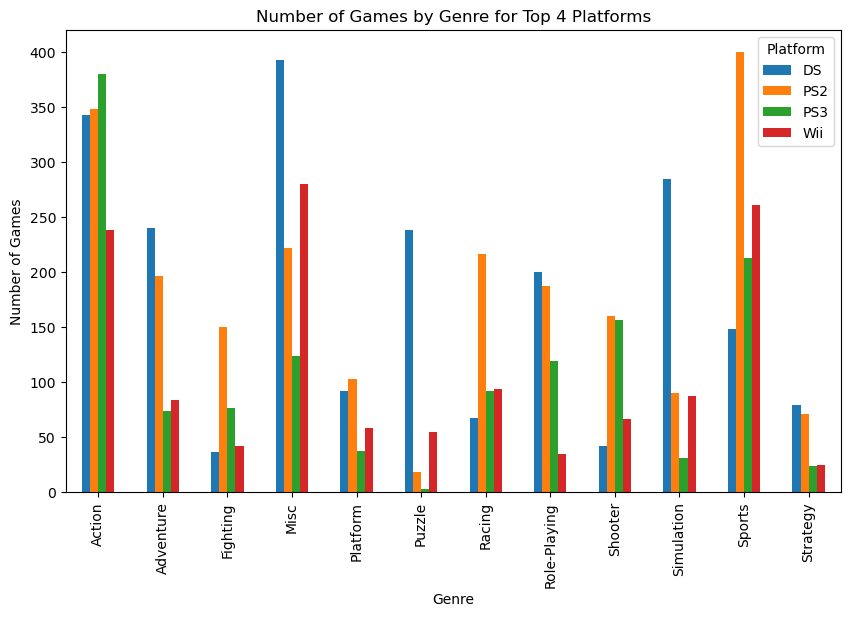

In [25]:
top4 = platform_genre_ct.head(4).drop(columns='Total')

top4.T.plot(kind='bar', figsize=(10,6))
plt.title("Number of Games by Genre for Top 4 Platforms")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.legend(title="Platform")
plt.show()

**Explanation**

The cross tabulation shows that PlayStation 2 and Nintendo DS have the most total number of games, which is then followed by PlayStation 3 and Wii. This makes sense as all of these consoles had long lifespans and strong popularity during their prime. The most common genres among all the platforms are Action, Sports, and Role-Playing. Genres like puzzle or strategy have fewer titles but are usually limited to the handheld systems.

### 2: Average Sales by Region for Each Platform

In [31]:
region_sales = (
    df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales']] #groups all games by console, then averages the regional sales for each
    .mean()
    .sort_values('NA_Sales', ascending=False) #This is so we can see the North American one first
)
region_sales.head(10)

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
NES,1.285102,0.215816,1.006633
GB,1.166531,0.487959,0.868571
GEN,0.713704,0.204444,0.098889
2600,0.681203,0.041128,0.000000
X360,0.475138,0.221802,0.009826
N64,0.435799,0.128715,0.107273
XOne,0.390563,0.214319,0.001596
Wii,0.383177,0.202551,0.052340
PS3,0.295154,0.258623,0.060188


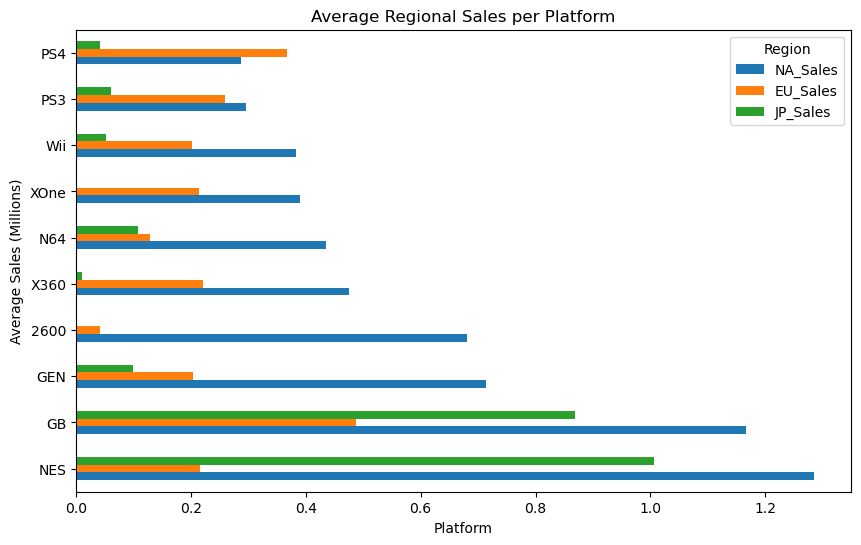

In [30]:
region_sales.head(10).plot(kind='barh', figsize=(10,6)) #I thought that the horizontal switched things up from the last one a bit
plt.title("Average Regional Sales per Platform")
plt.ylabel("Average Sales (Millions)")
plt.xlabel("Platform")
plt.legend(title="Region")
plt.show()

**Explanation:**

The horizontal bar chart above compares the average regional sales per platform across North America (NA), Europe (EU), and Japan (JP).

From the visualization, it’s clear that North America consistently has the highest average sales across all platforms.  
Older systems such as the NES, Game Boy (GB), and Atari 2600 show particularly strong performance in NA and Europe.

Japan’s average sales (green bars) are significantly smaller for most platforms, with the exceptions of Nintendo systems like the GB, NES, and Genesis (GEN), which performed better in the Japanese market.

These trends highlight clear regional preferences:
- Western markets (NA and EU) favored home consoles such as the Wii, Xbox 360, and PlayStation series.  
- The Japanese market preferred Nintendo-made systems and handheld consoles.

Overall, this demonstrates how cultural and market differences influences console success.


### 3. Average Sales by Genre

In [32]:
genre_sales = (
    df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
    .mean()
    .sort_values('Global_Sales', ascending=False)
)

genre_sales

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Genre,,,,
Platform,0.504571,0.227573,0.147596,0.938341
Shooter,0.444733,0.239137,0.029221,0.791885
Role-Playing,0.219946,0.126384,0.236767,0.623233
Racing,0.287766,0.190865,0.045388,0.586101
Sports,0.291283,0.160635,0.057702,0.567319
Fighting,0.263667,0.119481,0.103007,0.529375
Action,0.264726,0.158323,0.048236,0.528100
Misc,0.235906,0.124198,0.061967,0.465762
Simulation,0.211430,0.130773,0.073472,0.452364


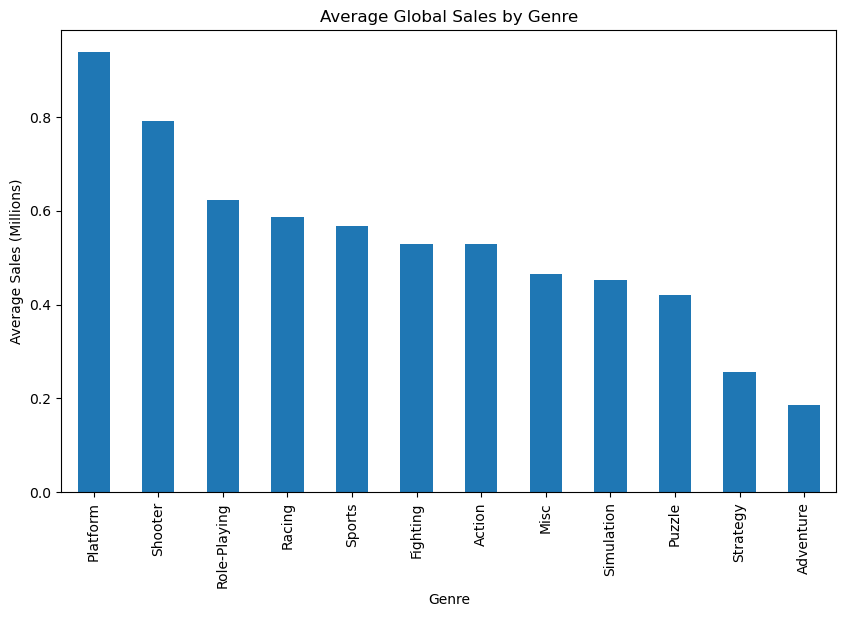

In [36]:
genre_sales['Global_Sales'].plot(kind='bar', figsize=(10,6))

plt.title("Average Global Sales by Genre")
plt.ylabel("Average Sales (Millions)")
plt.xlabel("Genre")
plt.show()

**Explanation:**

The bar chart shows the average global sales for each genre, and the results reveal that there are some that are much more popular than others:
- Platform games have the highest average global sales, followed closely by Shooter and Role-playing titles. These genres have larger franchises and larger audiences.
- Adventure, Puzzle, and Strategy genres show lower averages, likely because they target niche markets or smaller audiences.

### 4. Average and Maximum Sales by Year

In [37]:
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Group by year, calculate mean and max global sales
year_sales = df.groupby('Year')['Global_Sales'].agg(['mean', 'max'])

year_sales.head()

,mean,max
Year,,
1980,1.264444,4.31
1981,0.777609,4.50
1982,0.801667,7.81
1983,0.987647,3.20
1984,3.597143,28.31


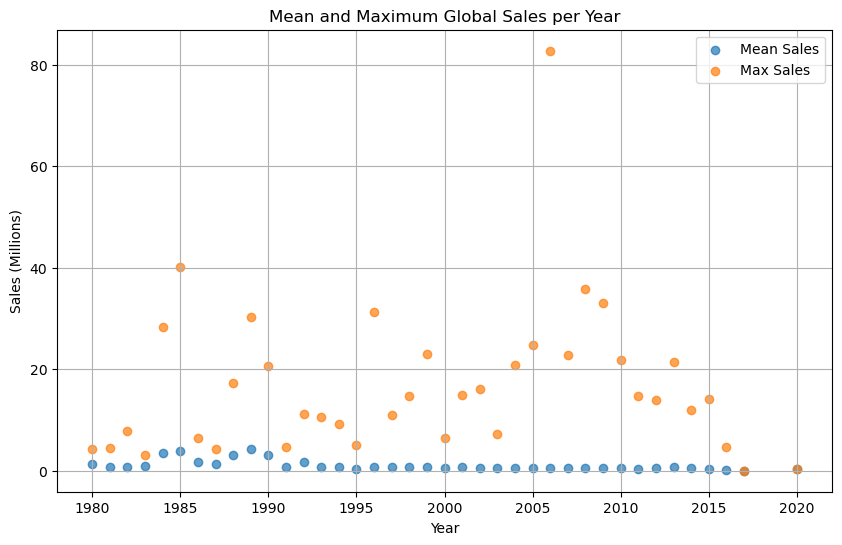

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(year_sales.index, year_sales['mean'], label='Mean Sales', alpha=0.7)
plt.scatter(year_sales.index, year_sales['max'], label='Max Sales', alpha=0.7)
plt.title("Mean and Maximum Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

The scatter plot displays the mean and maximum global sales of video games from 1980-2020. It shows that mean global sales remianed constantly low through the years. The orange dots however show that there are many sharp spikes, as blockbuster popular games were able to sell up to 80 million copies. 

The period between 2005 and 2009 shows the peak of the gaming industry in this dataset, corresponding to the success of consoles like the Nintendo Wii, PlayStation 3, and Xbox 360.  
After 2010, both the mean and max sales decline gradually, likely due to the shift toward digital downloads and mobile gaming.

Overall, the visualization suggests that while the gaming market became more saturated over time, its golden era of physical game sales occurred in the late 2000s.

### Conclusion:

In this analysis of Video Games Sales, several trends are clear:

- The Nintendo DS and PlayStation 2 lead in total number of games released, showing how influential these consoles were.  
- Regional data reveals strong geographic differences, North America dominates in total sales, while Japan shows concentrated success in handheld and Nintendo made platforms.  
- When grouped by genre, Platform, RPG, and Shooter games consistently have the highest average global sales.  
- The yearly trend analysis shows that the industry peaked around 2005–2009, the era of major franchises and record-breaking releases.

**Overall, the data captures the evolution of the video game market, from early 1980s growth to its mid 2000s boom and their quick transistion into more digital systems.**
